# Objective 
*** Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter. ***

# Importing all initially required dependencies/Libs

In [106]:
!pip install pyforest
!pip install pandas_profiling==2.7.1
import pyforest
import pandas_profiling

In [107]:
df = pd.read_csv('Data file.csv') # Loading dataset

<IPython.core.display.Javascript object>

# Performing EDA

In [86]:
df.shape # Checking shape 

(209593, 37)

In [87]:
len(df) # Checking dataset length

209593

In [88]:
df.sample(5) # Checking data Sample

Unnamed: 0  label       msisdn  ...  payback90  pcircle       pdate
196076      196077      1  17260I82730  ...   2.666667      UPW  2016-06-07
190075      190076      0  65525I82735  ...  31.500000      UPW  2016-06-27
39710        39711      1  95975I84450  ...   2.666667      UPW  2016-08-08
30258        30259      1  65178I82733  ...   0.000000      UPW  2016-07-08
89536        89537      1  10016I89234  ...   8.000000      UPW  2016-06-11

[5 rows x 37 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

<IPython.core.display.Javascript object>

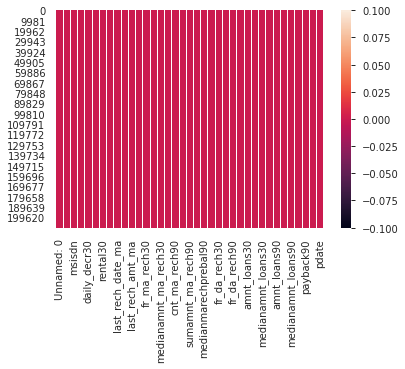

In [89]:
print(df.info())
sns.heatmap(df.isnull())

1. No null values are present in the dataset
2. msisdn, pcircle, pdate are in object format - They will be required to  be encoded.

In [108]:
# Genrating the profile report
profile = pandas_profiling.ProfileReport(df)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/49 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Feature Profile Analysis:**
1. *Unnamed: 0* - Induced by google colab and shall be deleted.
2. *label* - High cardinality,boolean datatype, imbalanced, 12.5% customers are the defaulters i.e (0).
3. *msisdn* - Hi cardinality 99.9% data is unique, represent mobile no of the customer
4. *aon (age on cellular network in days)* - No null values, No Zeros, no infinite values, some values are negative (-48) and some days are shown as fractions.
5. *daily_decr30 (Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah))* - has 2.0% zeros, some cost values are shown negative.
6. *daily_decr90 (Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah))* - some cost values are shown negative.
7. *rental30 (Average main account balance over last 30 days)* - some cost values are shown negative.
8. *rental90(Average main account balance over last 90 days)* - some cost values are shown negative.
9. *last_rech_date_ma(Number of days till last recharge of main account)*- Some values reflect negative ans some fractions in no. of days since last recharge.
10. *last_rech_date_da (Number of days till last recharge of data account)* - 96.8% zeros indicating no data recharge, Some values reflect negative ans some fractions in no. of days since last recharge.
11. *last_rech_amt_ma(Amount of last recharge of main account (in Indonesian Rupiah))* - 10% Zeros
12. *fr_ma_rech30(Frequency of main account recharged in last 30 days)* - Some values are seen in fraction.


In [91]:
# Checking stats summary
df.describe()

Unnamed: 0          label  ...      payback30      payback90
count  209593.000000  209593.000000  ...  209593.000000  209593.000000
mean   104797.000000       0.875177  ...       3.398826       4.321485
std     60504.431823       0.330519  ...       8.813729      10.308108
min         1.000000       0.000000  ...       0.000000       0.000000
25%     52399.000000       1.000000  ...       0.000000       0.000000
50%    104797.000000       1.000000  ...       0.000000       1.666667
75%    157195.000000       1.000000  ...       3.750000       4.500000
max    209593.000000       1.000000  ...     171.500000     171.500000

[8 rows x 34 columns]

1. In most of the columns max values are significantly higher than 75th percentile indicating presence of outliers.
2. High standard deviation shows dispersed data.
3. Mean is greater than median for most of the features indicating right sided tail skewed data

In [92]:
# Check for negative values
list = ['Unnamed: 0', 'label', 'aon', 'daily_decr30', 'daily_decr90','rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30','sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90','medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30','amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30','payback90']
for i in list:
  count = (df[i] < 0).sum()
  if count !=0 :
    print(f'The negative values in the column {i} are {count} & the percentage is {count/len(df)*100} \n')

The negative values in the column aon are 1539 & the percentage is 0.7342802479090428 

The negative values in the column daily_decr30 are 1839 & the percentage is 0.8774147991583688 

The negative values in the column daily_decr90 are 1839 & the percentage is 0.8774147991583688 

The negative values in the column rental30 are 5628 & the percentage is 2.6852041814373573 

The negative values in the column rental90 are 5929 & the percentage is 2.828815847857514 

The negative values in the column last_rech_date_ma are 1315 & the percentage is 0.6274064496428793 

The negative values in the column last_rech_date_da are 14 & the percentage is 0.006679612391635217 

The negative values in the column medianmarechprebal30 are 1646 & the percentage is 0.785331571187969 

The negative values in the column medianmarechprebal90 are 1730 & the percentage is 0.8254092455377804 



We can see that column rental30,column rental90 of the features carrying information regarding age and money reflect negative values and max values are around 3 %.

In [93]:
# Total Data with less than zero values
(df[(df['last_rech_date_da'] < 0) | (df['rental30'] < 0) |(df['aon'] < 0) |(df['daily_decr90'] < 0) |(df['daily_decr30'] < 0) |(df['rental90'] < 0) |
   (df['last_rech_date_ma'] < 0) |(df['medianmarechprebal30'] < 0) |(df['medianmarechprebal30'] < 0)]).shape

(12088, 37)

## VISUALIZATION

### Univariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

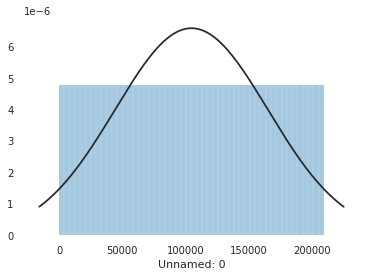

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

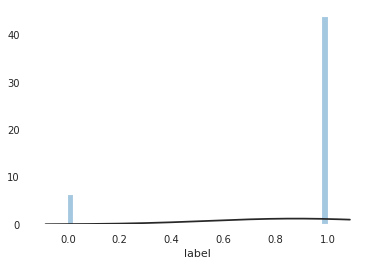

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

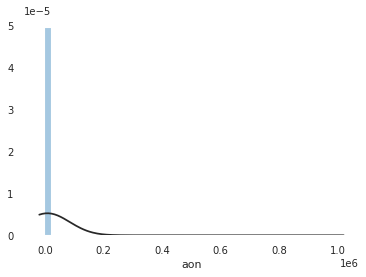

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

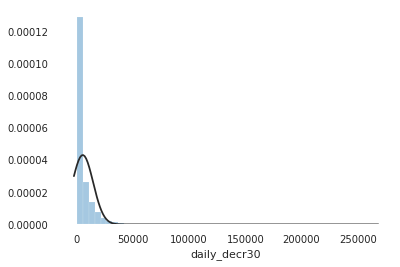

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

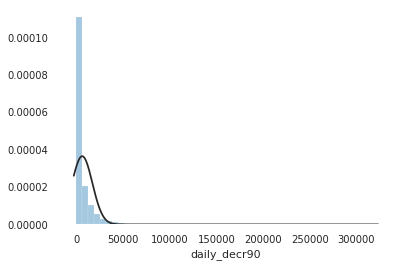

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

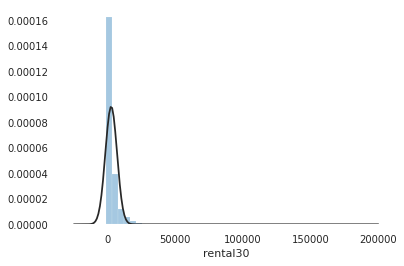

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

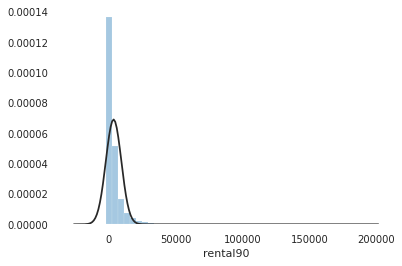

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

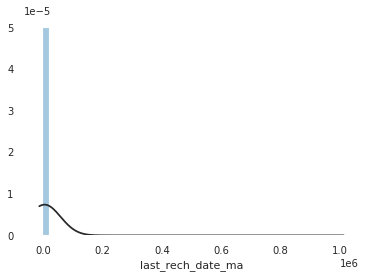

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

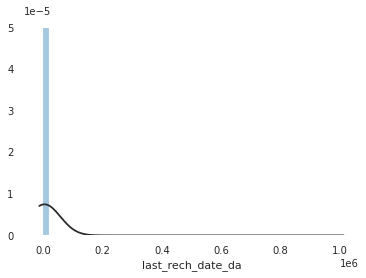

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

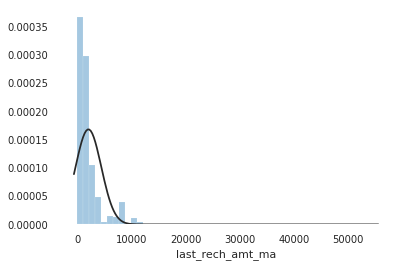

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

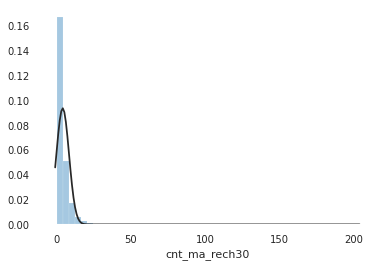

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

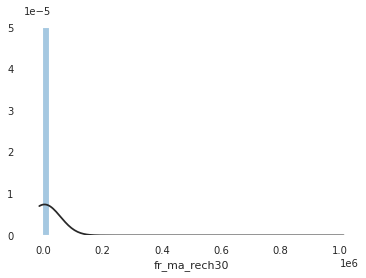

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

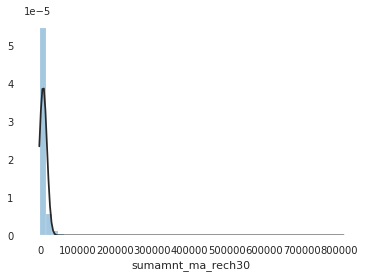

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

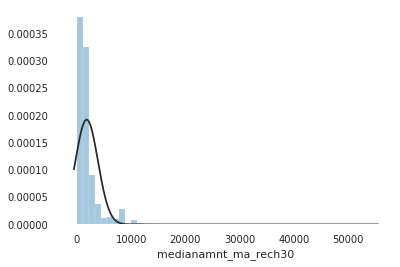

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

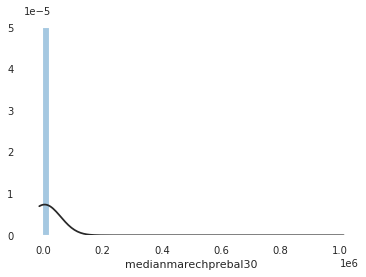

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

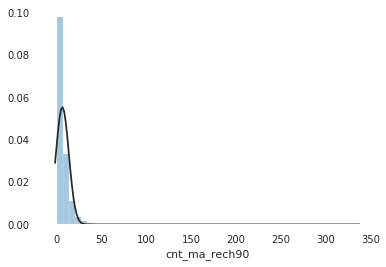

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

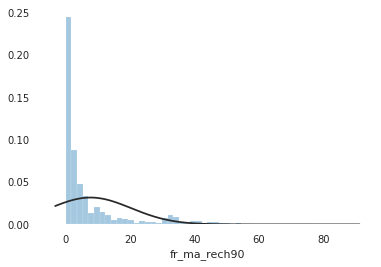

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

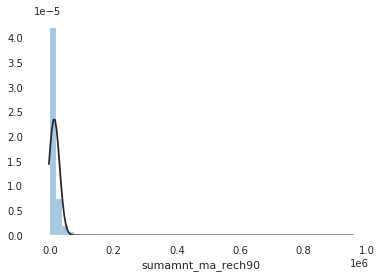

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

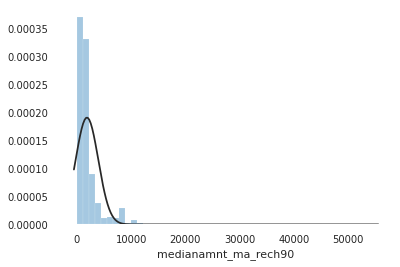

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

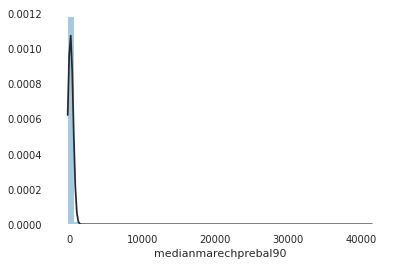

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

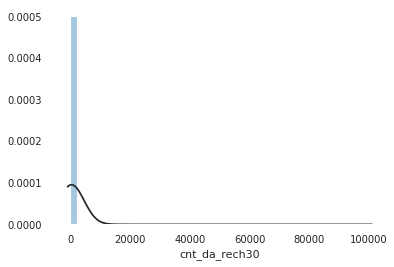

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

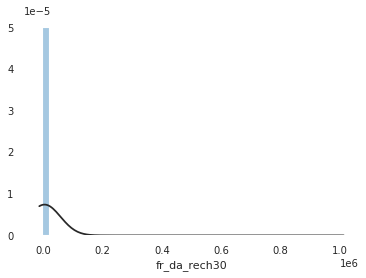

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

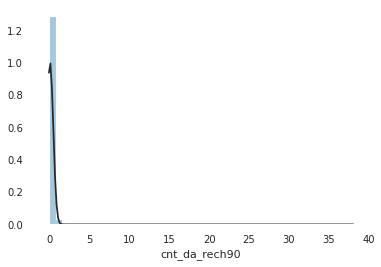

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

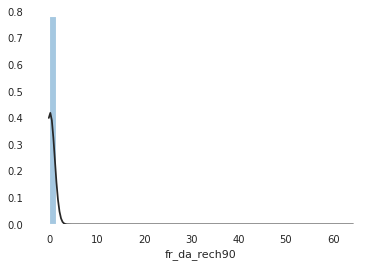

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

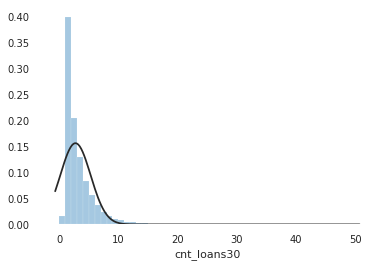

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

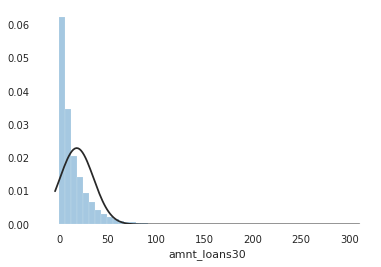

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

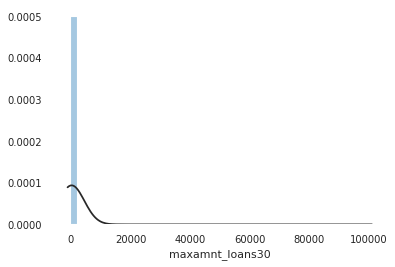

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

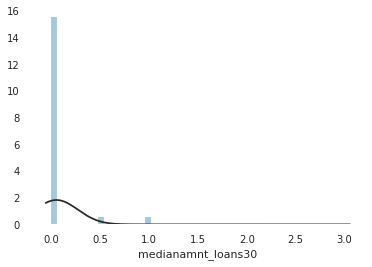

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

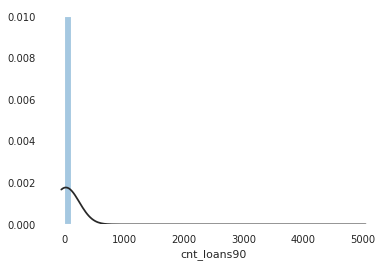

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

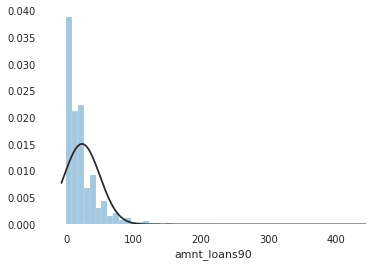

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

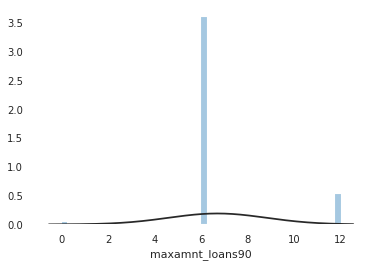

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

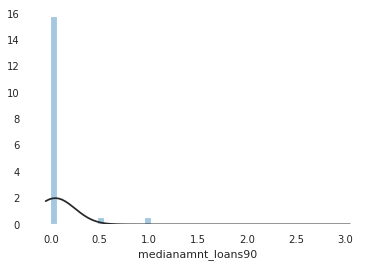

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

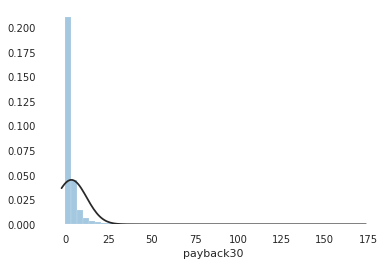

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

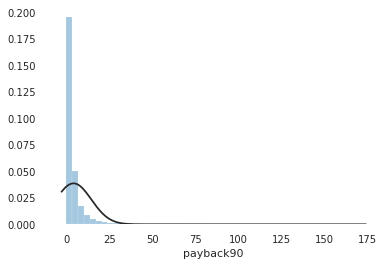

In [94]:
# Plot the distribution with a histogram and maximum likelihood gaussian distribution fit:
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
for i in df.describe().columns:
    sns.distplot(df[i], fit=norm, kde=False)
    plt.show()

Features do not exhibit normal distribution

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

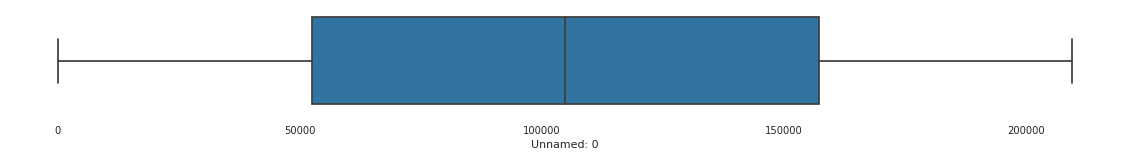

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

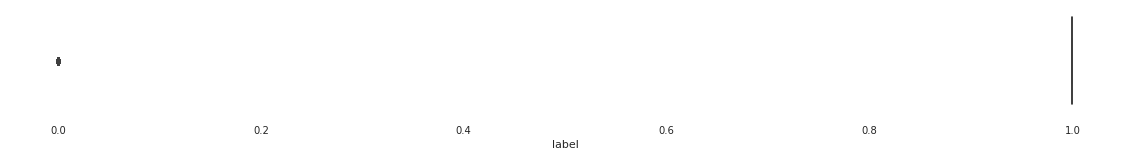

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

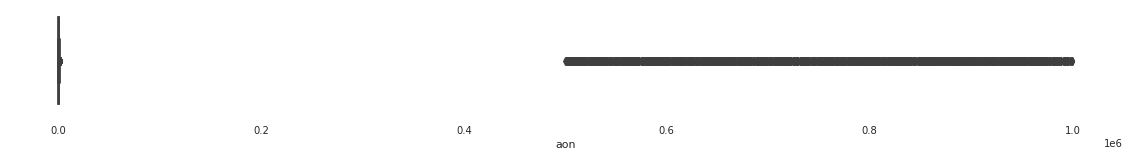

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

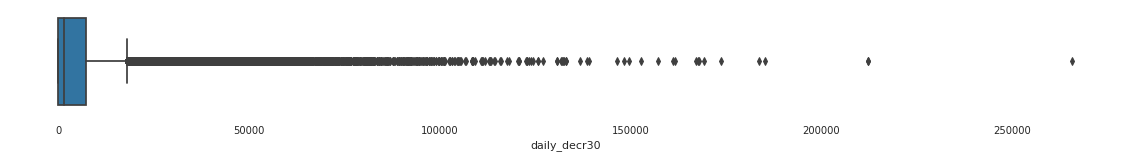

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

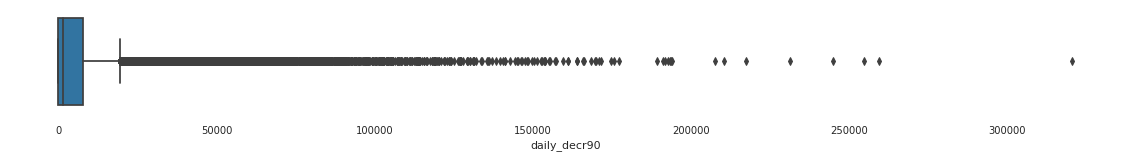

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

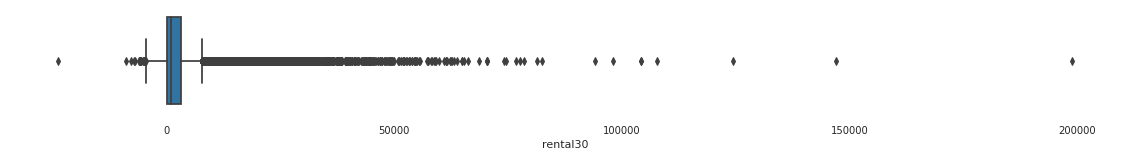

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

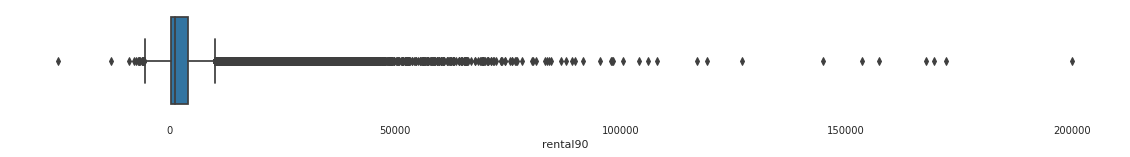

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

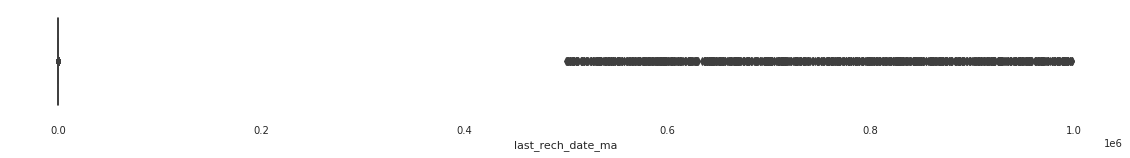

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

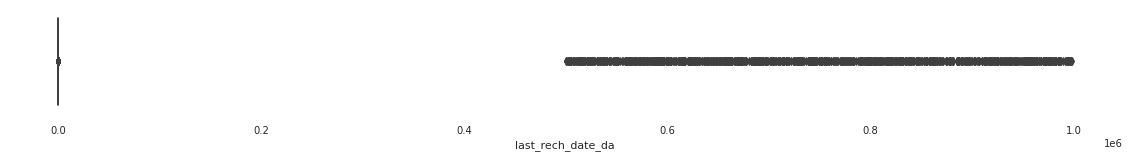

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

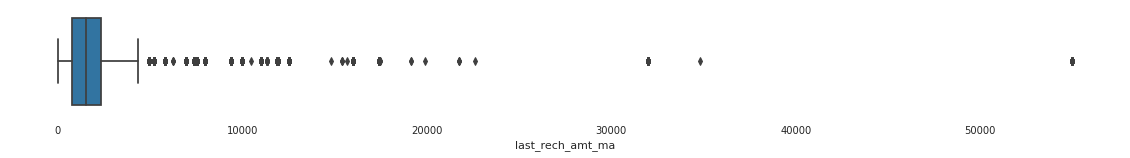

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

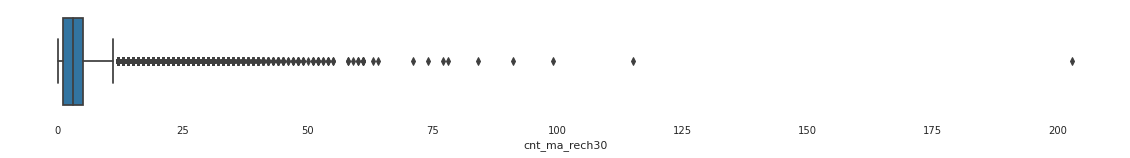

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

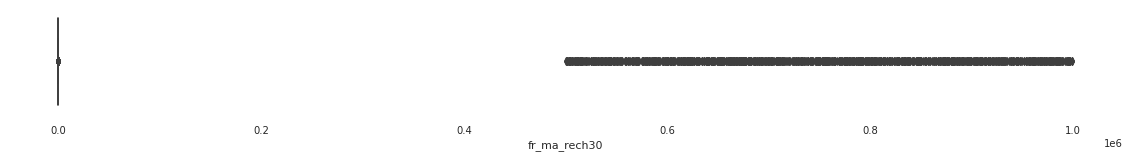

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

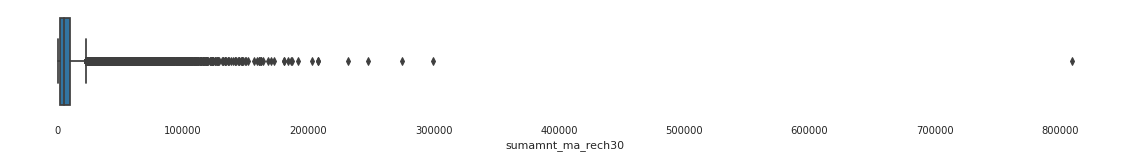

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

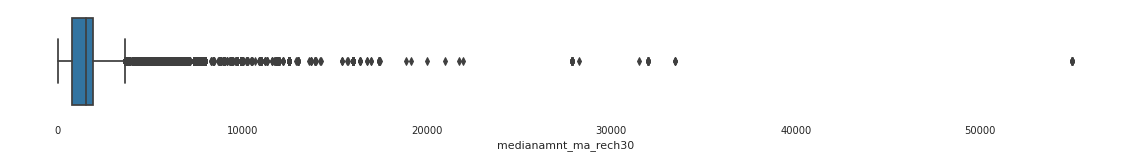

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

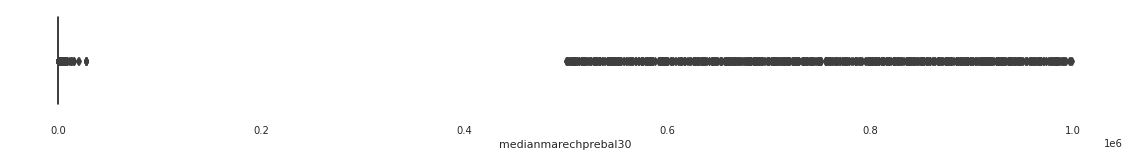

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

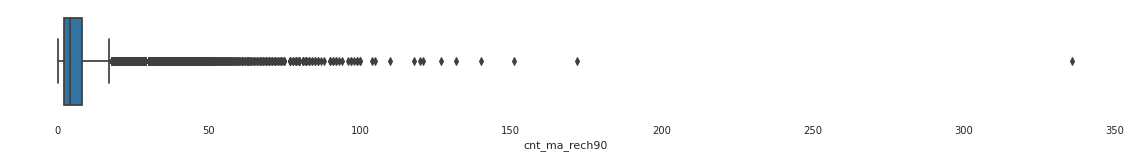

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

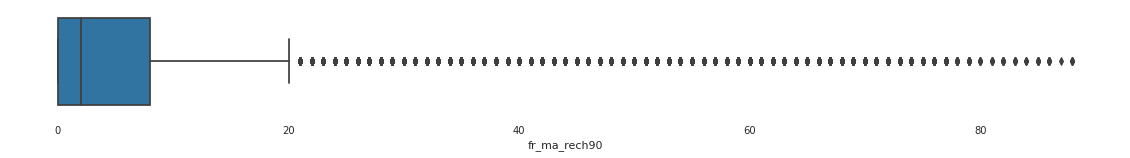

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

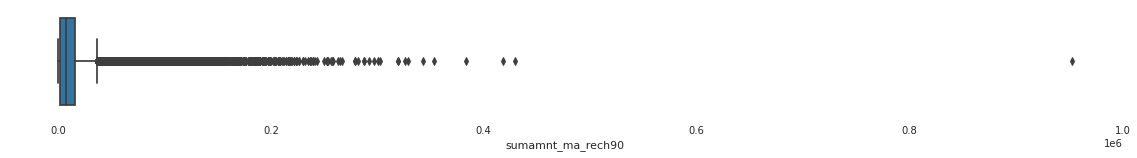

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

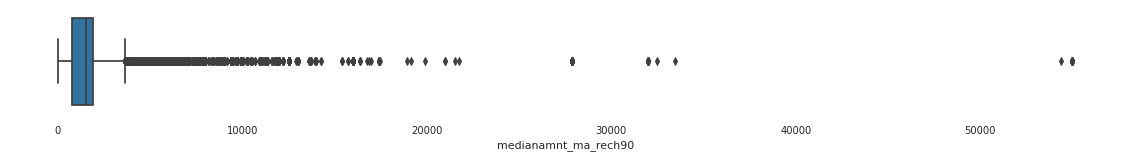

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

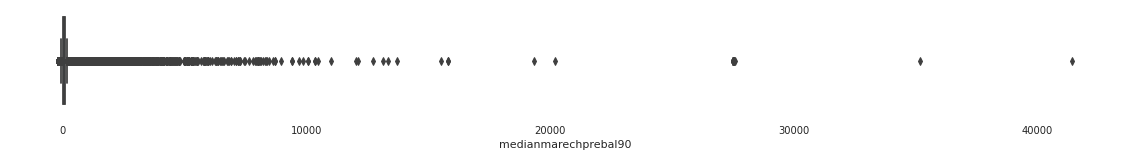

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

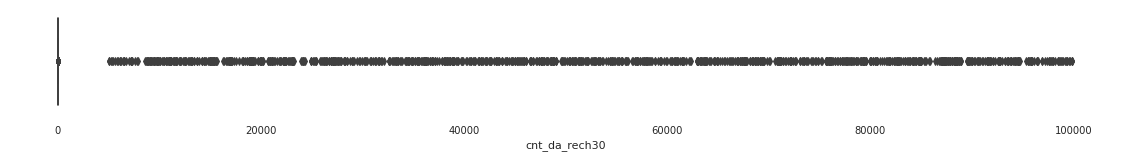

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

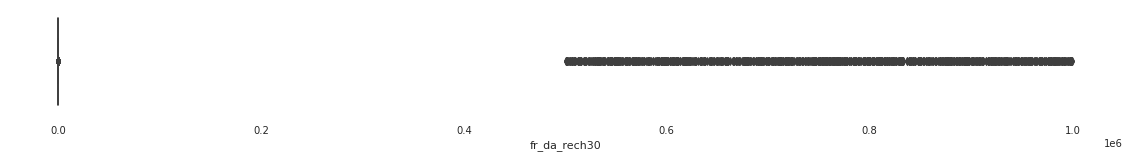

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

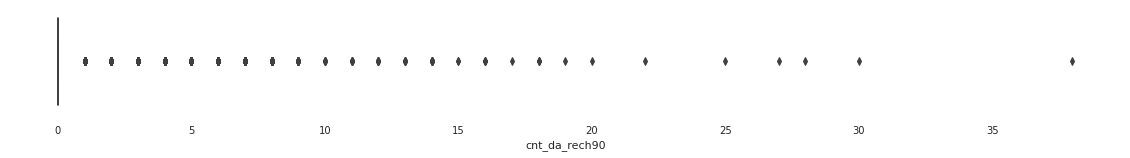

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

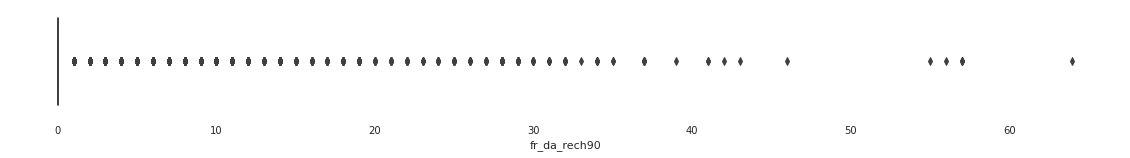

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

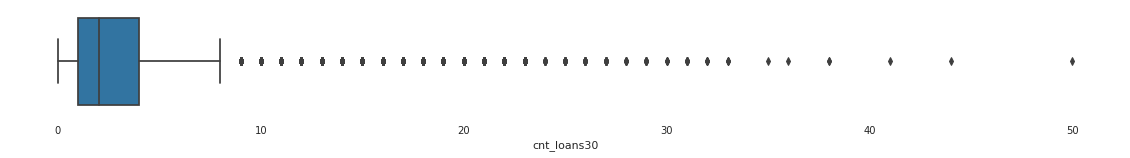

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

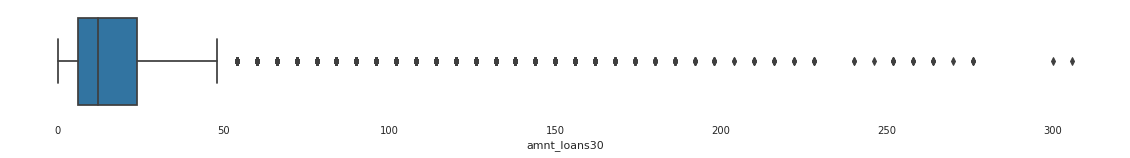

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

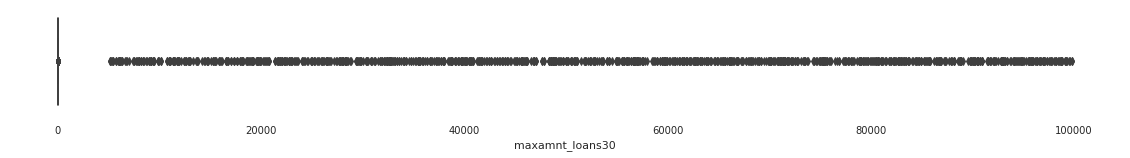

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

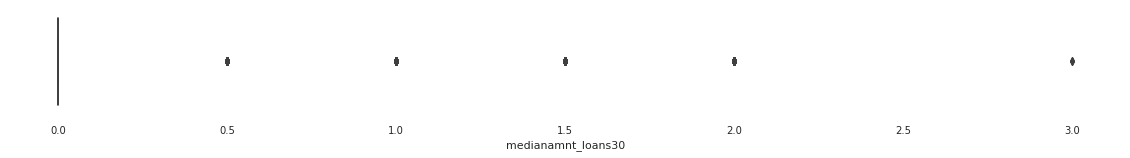

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

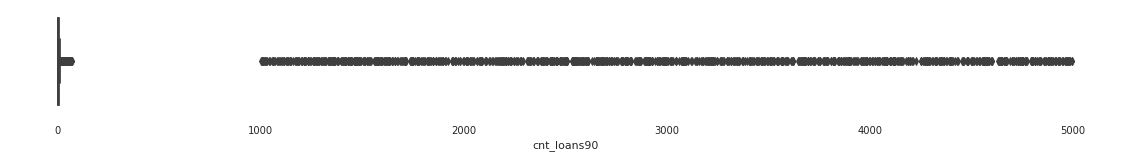

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

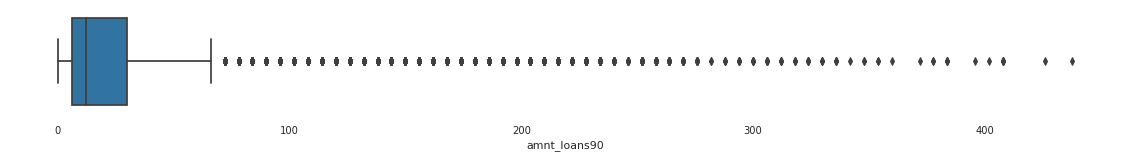

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

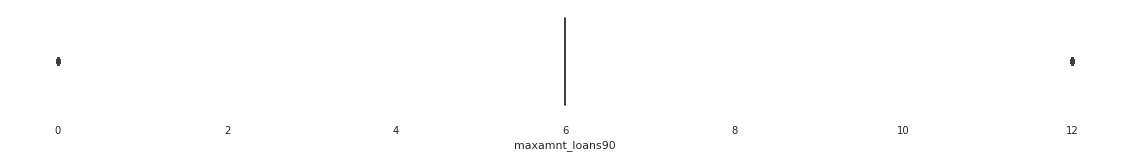

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

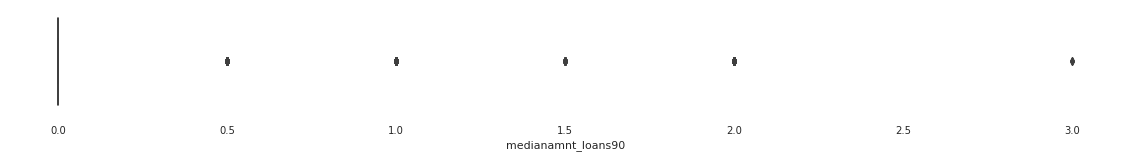

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

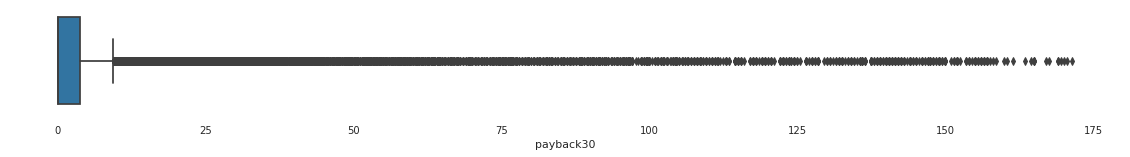

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

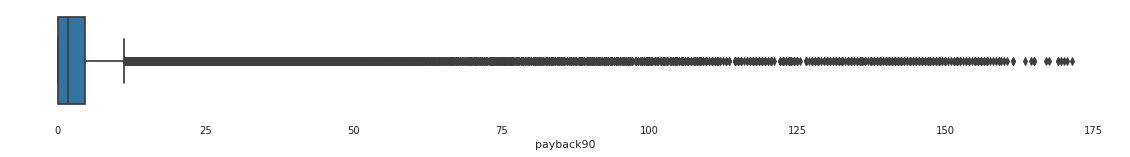

In [95]:
for i in df.describe().columns:
  plt.figure(figsize = (20,2))
  sns.boxplot(df[i])
  plt.show()

All features exhibit significant outliers

### Bivariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

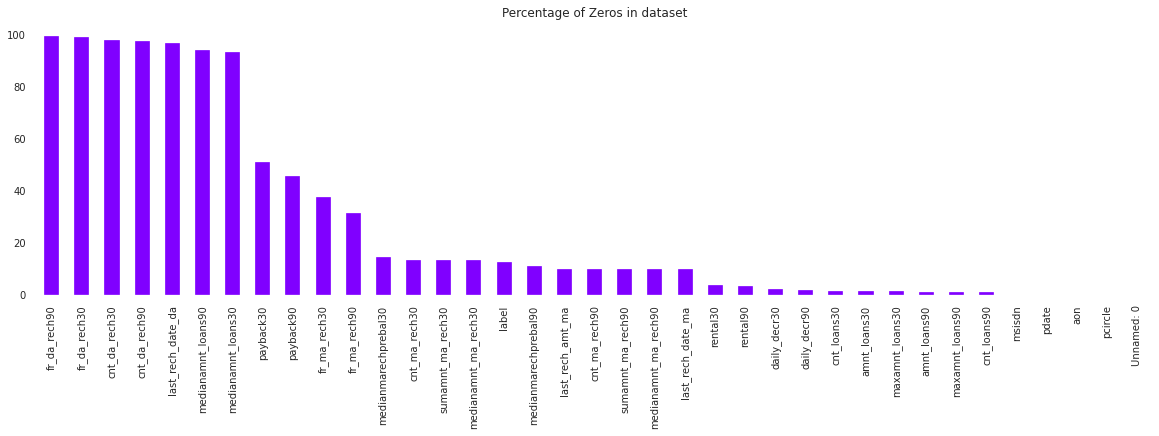

In [96]:
# Check for Zero values
%matplotlib inline
plt.figure(figsize = (20,5))
(df[df == 0].count(axis=0)/len(df)* 100).sort_values(ascending = False).plot(kind = 'bar', cmap = 'rainbow')
plt.title('Percentage of Zeros in dataset')
plt.show()

**Features/Columns with very high no. of zero's**

1. *fr_da_rech90 = 99.587295* - Is the frequency of data account recharged in last 90 days
2. *fr_da_rech30 = 99.246635* - Frequency of data account recharged in last 30 days
3. *cnt_da_rech30 = 98.037148* - Number of times data account got recharged in last 30 days
4. *cnt_da_rech90 = 97.439323* - Number of times data account got recharged in last 90 days
5. *last_rech_date_da = 96.788061* - Number of days till last recharge of data account
6. *medianamnt_loans90 = 94.193985* - Median of amounts of loan taken by the user in last 90 days
7. *medianamnt_loans30 = 93.249775* - Median of amounts of loan taken by the user in last 30 days
8. *payback30 = 50.913914* - Average payback time in days over last 30 days
9. *payback90 = 45.659445* - Average payback time in days over last 90 days
10. *fr_ma_rech30 = 37.540853* - Frequency of main account recharged in last 30 days
11. *fr_ma_rech90 = 31.371754* - Frequency of main account recharged in last 90 days

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

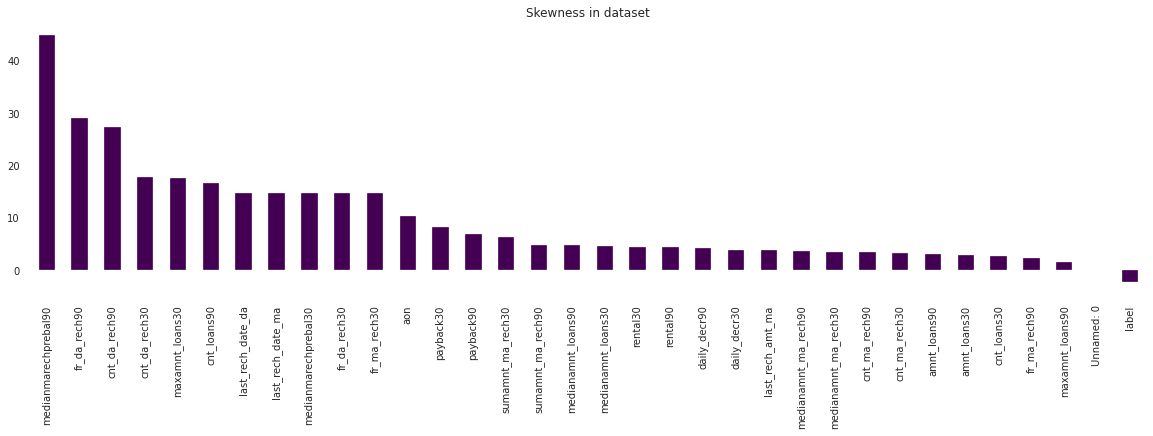

In [97]:
# Checking skewness
%matplotlib inline
plt.figure(figsize = (20,5))
df.skew().sort_values(ascending = False).plot(kind = 'bar', cmap = 'viridis')
plt.title('Skewness in dataset')
plt.show()

skew in all features is more that +/- 0.5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

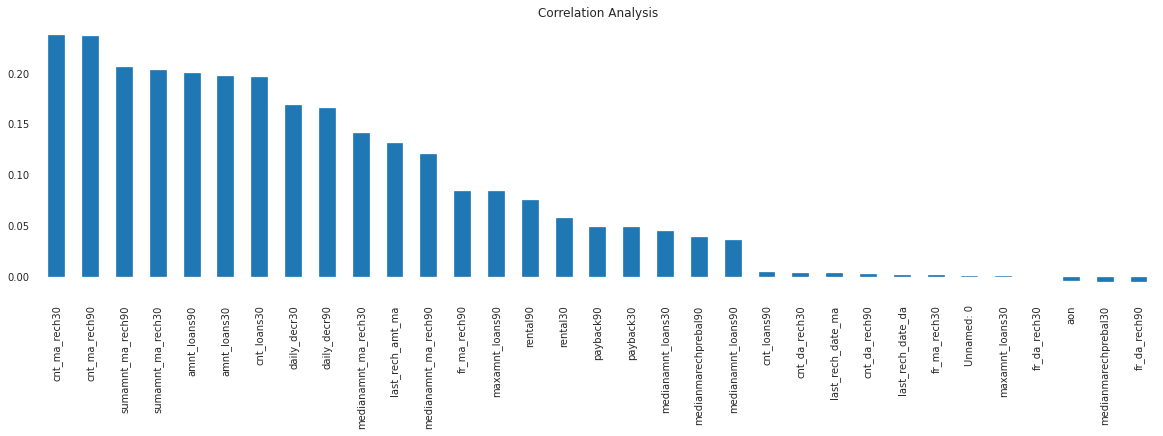

In [98]:
plt.figure(figsize = (20,5))
corr0 = df.drop('label', axis =1).corrwith(df['label'])
corr0.sort_values(ascending = False).plot(kind ='bar')
plt.title('Correlation Analysis')
plt.show()

fr_ma_rech90,maxamnt_loans90,rental90,rental30,payback90,payback30,medianamnt_loans30,medianmarechprebal90,medianamnt_loans90,cnt_loans90,cnt_da_rech30,last_rech_date_ma,cnt_da_rech90,last_rech_date_da,fr_ma_rech30
Unnamed: 0,maxamnt_loans30,fr_da_rech30,aon,medianmarechprebal30,fr_da_rech90 features has correlation lesser than 0.1

**Conclusion from EDA**

1. No null values are present in the dataset but is imbalanced i.e label has only 12.5% occurrence.
2. msisdn, pcircle, pdate are in object format - They will be required to  be encoded.
3. fr_ma_rech90,maxamnt_loans90,rental90,rental30,payback90,payback30,medianamnt_loans30,medianmarechprebal90,medianamnt_loans90,cnt_loans90,cnt_da_rech30,last_rech_date_ma,cnt_da_rech90,last_rech_date_da,fr_ma_rech30 Unnamed: 0,maxamnt_loans30,fr_da_rech30,aon,medianmarechprebal30,fr_da_rech90 features has correlation lesser than 0.1
4. Skew in all features is more that +/- 0.5
5. fr_da_rech90,fr_da_rech30, cnt_da_rech30, cnt_da_rech90, last_rech_date_da, medianamnt_loans90, medianamnt_loans30 posses more than 90% zeros.
6. All features exhibit significant outliers.
7. Features do not exhibit normal distribution, though logistics regression corresponds best to normally distributed data.
8. We can see that column rental30,column rental90 of the features carrying information regarding age and money posses 3% negative values.

# Pre-processing

Steps:
1. pdate format shall be converted to days and drop pdate column
2. msisdn, pcircle, unnamed:0 columns shall be droped for having high caridnality.
3. Negative values & Zeros shall be imputed accordingly.
5. Target variable shall be balanced before training the model

In [99]:
# Adding one more column age of pdate(network) in days
now = pd.Timestamp('now')  # To specify current date in time stamp format
df['pdate'] = pd.to_datetime(df['pdate'], infer_datetime_format = True) # Convert DOB column in datestamp format
df['Age'] = (now - df['pdate']).astype('timedelta64[D]') # Adding column age with formated in days
# droping the four columns
df.drop(['msisdn', 'pcircle', 'Unnamed: 0','pdate' ], axis = 1, inplace = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [100]:
# Eliminating neagtive values
list = ['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90','last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30','medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90','medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30','maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90','Age']
for i in list:
  df[i]=df[i] ** 2

In [101]:
# Removing skewness using log method
list = ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90','last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
        'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30','medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90','medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30','maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90','Age']
for i in list:
    if df[i].skew()>0.5:
        df[i]=np.log1p(df[i])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [102]:
corr = df.drop('label', axis =1).corrwith(df['label'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

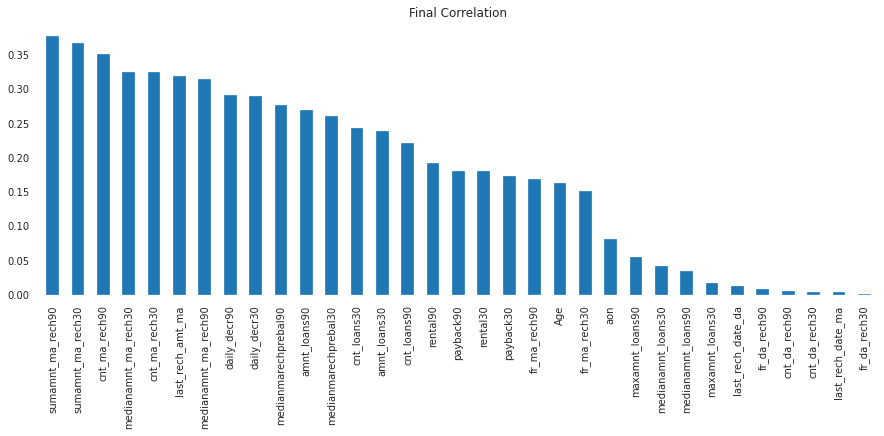

In [103]:
plt.figure(figsize = (15,5))
abs(corr).sort_values(ascending = False).plot(kind = 'bar')
plt.title('Final Correlation')
plt.show()

In [104]:
# Drop all features with less than 0.1 correlation
df.drop(['aon','maxamnt_loans90','medianamnt_loans30','medianamnt_loans90','maxamnt_loans30','last_rech_date_da',
         'fr_da_rech90','cnt_da_rech90','cnt_da_rech30','last_rech_date_ma','fr_da_rech30'],axis = 1, inplace = True)


In [105]:
df.shape

(209593, 23)

# Building the Model

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# To find the best random state pre-outlier removal
# Defining Dependent & independent variables
x = df.drop(['label'], axis=1)
y = df['label']
best_r_state = 0
accu = 0
for i in range (30,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    predlr = lr.predict(x_test)
    lr.score(x_train,y_train)
    tempaccu = accuracy_score(y_test,predlr)
    if tempaccu > accu:
        accu = tempaccu
        best_r_state = i
    
    
print(f'pre scaling accuracy is {accu * 100}% best random state is {best_r_state}\n')

# To find the best random state with scaled data

x = df.drop(['label'], axis=1)
y = df['label']
ssc = StandardScaler()
x = ssc.fit_transform(x)
best_r_state = 0
accu = 0
for i in range (30,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    predlr = lr.predict(x_test)
    lr.score(x_train,y_train)
    tempaccu = accuracy_score(y_test,predlr)
    if tempaccu > accu:
        accu = tempaccu
        best_r_state = i
    

print(f'Post scaling accuracy is {accu * 100}% best random state is {best_r_state}\n')




pre scaling accuracy is 88.45828544165167% best random state is 36

Post scaling accuracy is 89.2715404133504% best random state is 81



In [ ]:
# To find the best random state with PCA
x = df.drop(['label'], axis=1)
y = df['label']
pca = PCA(10)
x = pca.fit_transform(x)
best_r_state = 0
accu = 0
for i in range (30,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    predlr = lr.predict(x_test)
    lr.score(x_train,y_train)
    tempaccu = accuracy_score(y_test,predlr)
    if tempaccu > accu:
        accu = tempaccu
        best_r_state = i


print(f'Post dimensionality reduction accuracy is {accu * 100}% best random state is {best_r_state}\n')

Post dimensionality reduction accuracy is 89.13925093795406% best random state is 81



In [52]:
# To find the best fit ensemble algorithm
model = [AdaBoostClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]
x = df.drop(['label'], axis=1)
y = df['label']
pca = PCA(10)
x = pca.fit_transform(x)
ssc = StandardScaler()
x = ssc.fit_transform(x)
for m in model:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = 81)
    m.fit(x_train,y_train)
    mpred = m.predict(x_test)
    ack=accuracy_score(y_test,mpred)
    cvscore = cross_val_score(m,x,y,cv = 5).mean()
    
    print(f'For Algorithm {m} accuracy is {ack * 100}% & cross_val Score is {cvscore * 100}% \n')


For Algorithm AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None) accuracy is 90.94792999501203% & cross_val Score is 90.71295389280635% 

For Algorithm RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) accuracy is 91.7850404458806% & cross_val Score is 91.66288990895802% 

For Algorithm GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='

It can be seen that Random Forest Classifier is the best performing Algorithm

In [ ]:
# Indentifying best fit balancing algorithm for the dataset
list = [RandomOverSampler(), SMOTE(), RandomUnderSampler(sampling_strategy='majority')]
b_m = RandomForestClassifier()
x = df.drop(['label'], axis=1)
y = df['label']
pca = PCA(10)
x = pca.fit_transform(x)
ssc = StandardScaler()
x = ssc.fit_transform(x)
for s in list:
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = 59)
  x_s,y_s = s.fit_sample(x_train,y_train)
  b_m.fit(x_s,y_s)
  mpred = b_m.predict(x_test)
  ack=accuracy_score(y_test,mpred)
  cvscore = cross_val_score(b_m,x,y,cv = 5).mean()
  print(f'For Algorithm {s} accuracy is {ack * 100}% & cross_val Score is {cvscore * 100}% \n')


For Algorithm RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto') accuracy is 91.59202793259743% & cross_val Score is 91.67004668204946% 

For Algorithm SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=None, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated') accuracy is 89.59250504218083% & cross_val Score is 91.64046526600951% 

For Algorithm RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='majority') accuracy is 83.773936804667% & cross_val Score is 91.64619096903263% 



Random over sampler is seen as best performing balancing algorithm

In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
rfc1 = RandomForestClassifier()
parameters = {'criterion' : ['gini','entropy'], 'max_features':['auto', 'sqrt', 'log2']}
xgb_grid = GridSearchCV(rfc1,parameters)

xgb_grid.fit(x_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.916425058215007
{'criterion': 'entropy', 'max_features': 'auto'}


Accuracy is 91.4380516579558%

Cross_val Score is 91.65477903983238% 



<IPython.core.display.Javascript object>

                precision    recall  f1-score   support

     defaulter       0.67      0.59      0.63      5651
Non- defaulter       0.94      0.96      0.95     40460

      accuracy                           0.91     46111
     macro avg       0.81      0.78      0.79     46111
  weighted avg       0.91      0.91      0.91     46111



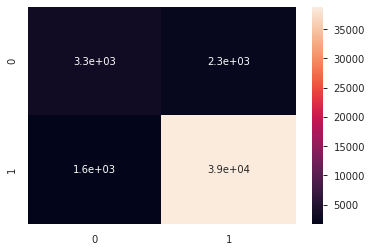

In [57]:
# Building & Testing the model
x = df.drop(['label'], axis=1)
y = df['label']

pca = PCA(10)
x = pca.fit_transform(x)
ssc = StandardScaler()
x = ssc.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = 77)

over= RandomOverSampler()
x_s,y_s = over.fit_sample(x_train,y_train)

model=  RandomForestClassifier(criterion ='entropy', max_features ='auto')

model.fit(x_s,y_s)
mpred = model.predict(x_test)

ack=accuracy_score(y_test,mpred)

cvscore = cross_val_score(model,x,y,cv = 5).mean()

print(f'Accuracy is {ack * 100}%\n')
print(f'Cross_val Score is {cvscore * 100}% \n')
target_names = ['defaulter', 'Non- defaulter']
sns.heatmap(confusion_matrix(y_test,mpred), annot = True )
print(classification_report(y_test,mpred,target_names=target_names))

Accuracy is 91.68094380950316%

Cross_val Score is 91.91432966320674% 



<IPython.core.display.Javascript object>

                precision    recall  f1-score   support

     defaulter       0.68      0.61      0.64      5651
Non- defaulter       0.95      0.96      0.95     40460

      accuracy                           0.92     46111
     macro avg       0.81      0.79      0.80     46111
  weighted avg       0.91      0.92      0.91     46111



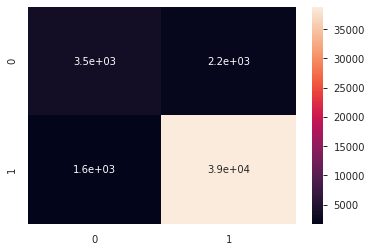

In [56]:
# Building & Testing the model
x = df.drop(['label'], axis=1)
y = df['label']

ssc = StandardScaler()
x = ssc.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = 77)

over= RandomOverSampler()
x_s,y_s = over.fit_sample(x_train,y_train)

model1=  RandomForestClassifier(criterion ='entropy', max_features ='auto')

model1.fit(x_s,y_s)
mpred = model1.predict(x_test)

ack=accuracy_score(y_test,mpred)

cvscore = cross_val_score(model1,x,y,cv = 5).mean()

print(f'Accuracy is {ack * 100}%\n')
print(f'Cross_val Score is {cvscore * 100}% \n')
target_names = ['defaulter', 'Non- defaulter']
sns.heatmap(confusion_matrix(y_test,mpred), annot = True )
print(classification_report(y_test,mpred,target_names=target_names))

Prediction probability is 93%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

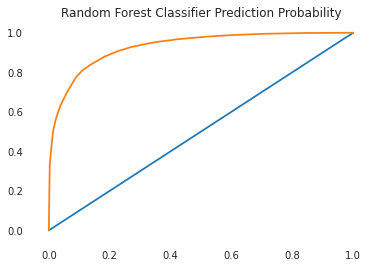

In [ ]:
y_pred_prob = model1.predict_proba(x_test)[0:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
auc_score = roc_auc_score(y_test,y_pred_prob)
print(f'Prediction probability is {round(auc_score*100)}%')
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.title('Random Forest Classifier Prediction Probability')
plt.show() 

In [ ]:
import joblib
joblib.dump(model1,'micro_credit_defaulter_prediction.obj')

['micro_credit_defaulter_prediction.obj']